https://www.kaggle.com/competitions/rsna-breast-cancer-detection/data?select=train.csv

In [1]:
# imports
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.6.2


In [2]:
# Import the data
import io
df = pd.read_csv(r'C:\Users\pedro\Desktop\Data Science\Advanced Machine Learning\Deep Learning\Mamography\train.csv\train.csv')

# Exploracion y limpieza

In [3]:
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [4]:
df.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


In [5]:
df.shape

(54706, 14)

In [6]:
#eliminado de filas duplicadas.
print('Duplicados:', df.duplicated().sum())
df.drop_duplicates()

Duplicados: 0


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [7]:
#Identificando valores faltantes
df.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [8]:
df.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
dtype: object

In [9]:
#Inconsistencia

print('laterality', df['laterality'].unique().tolist())

laterality ['L', 'R']


In [10]:
print('view', df['view'].unique().tolist())

view ['CC', 'MLO', 'ML', 'LM', 'AT', 'LMO']


In [11]:
print('density', df['density'].unique().tolist())

density [nan, 'C', 'D', 'B', 'A']


<AxesSubplot:>

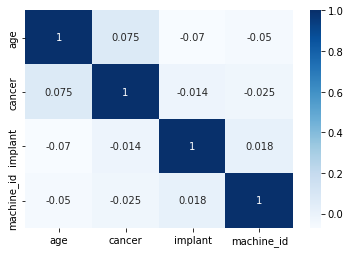

In [12]:
import seaborn as sns
from seaborn import distplot
corr = df.drop(['site_id','patient_id','image_id','biopsy','invasive','BIRADS','density','difficult_negative_case'], axis=1).corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

# Realizar una división train-test en tus datos

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

Dropped innecesary columns

In [14]:
# Division
X = df.drop(['cancer','site_id','patient_id','image_id','biopsy','invasive','BIRADS','density','difficult_negative_case'], axis=1)
y = df['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

In [15]:
y.unique()

array([0, 1], dtype=int64)

# Transformador de columna para escalar las características y predecir valores faltantes.

In [16]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
# Tuples para Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [17]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (41029, 10)




array([[-0.05649646, -0.16706079, -0.57103508, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.03630392, -0.16706079, -0.14469835, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93695843, -0.16706079, -0.14469835, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.23499489,  5.98584506, -0.12225958, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15584195, -0.16706079, -0.14469835, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14219452, -0.16706079, -0.12225958, ...,  0.        ,
         0.        ,  1.        ]])

# Definicion de modelo

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# Sequential model
model = Sequential()

In [20]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_processed.shape[1]
input_shape

10

In [21]:
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# third hidden layer
model.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
                # Output layer
# Para problemas de clasificación, debemos utilizar la función de activación sigmoide.
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = 'accuracy')

In [22]:
# Step 3: Fit our model
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=10)

Epoch 1/10
1283/1283 [==============================] - 1s 684us/step - loss: 0.1485 - accuracy: 0.9719 - val_loss: 0.0999 - val_accuracy: 0.9788
Epoch 2/10
1283/1283 [==============================] - 1s 562us/step - loss: 0.0997 - accuracy: 0.9788 - val_loss: 0.0994 - val_accuracy: 0.9788
Epoch 3/10
1283/1283 [==============================] - 1s 558us/step - loss: 0.0995 - accuracy: 0.9788 - val_loss: 0.0994 - val_accuracy: 0.9788
Epoch 4/10
1283/1283 [==============================] - 1s 561us/step - loss: 0.0994 - accuracy: 0.9788 - val_loss: 0.0991 - val_accuracy: 0.9788
Epoch 5/10
1283/1283 [==============================] - 1s 606us/step - loss: 0.0992 - accuracy: 0.9788 - val_loss: 0.0993 - val_accuracy: 0.9788
Epoch 6/10
1283/1283 [==============================] - 1s 580us/step - loss: 0.0992 - accuracy: 0.9788 - val_loss: 0.0997 - val_accuracy: 0.9788
Epoch 7/10
1283/1283 [==============================] - 1s 560us/step - loss: 0.0992 - accuracy: 0.9788 - val_loss: 0.0996 -

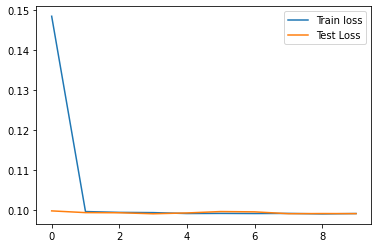

In [23]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

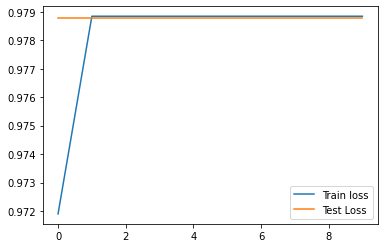

In [24]:
# Visualize the loss
plt.plot(history.history['accuracy'], label='Train loss')
plt.plot(history.history['val_accuracy'], label='Test Loss')
plt.legend();

In [25]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test_processed)
prediction=np.round(predictions)
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     13677
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98     13677
   macro avg       0.50      0.49      0.49     13677
weighted avg       1.00      0.98      0.99     13677



c:\Users\pedro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

# Test

In [26]:
# Import the test data
import io
df_test = pd.read_csv(r'C:\Users\pedro\Desktop\Data Science\Advanced Machine Learning\Deep Learning\Mamography\test.csv')

In [27]:
df_test.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [28]:
X.head()

,laterality,view,age,implant,machine_id
0,L,CC,61.0,0,29
1,L,MLO,61.0,0,29
2,R,MLO,61.0,0,29
3,R,CC,61.0,0,29
4,L,CC,55.0,0,21


In [29]:
X_testing = df_test.drop(['site_id','patient_id','image_id','prediction_id'], axis=1)
X_testing.head()

,laterality,view,age,implant,machine_id
0,L,MLO,81,0,21
1,L,CC,81,0,21
2,R,MLO,81,0,21
3,R,CC,81,0,21


In [30]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
# Tuples para Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_testing_processed = col_transformer.transform(X_testing)

In [31]:
df_test.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [32]:
model.predict(X_testing_processed)


array([[0.04811957],
       [0.04366323],
       [0.04653677],
       [0.04195881]], dtype=float32)

In [33]:
predict = model.predict(X_testing_processed)
pred = pd.DataFrame(predict,columns=['cancer'])

In [35]:
df_test['cancer']= pred

In [36]:
df_test.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id,cancer
0,2,10008,736471439,L,MLO,81,0,21,10008_L,0.048120
1,2,10008,1591370361,L,CC,81,0,21,10008_L,0.043663
2,2,10008,68070693,R,MLO,81,0,21,10008_R,0.046537
3,2,10008,361203119,R,CC,81,0,21,10008_R,0.041959


In [37]:
sample_df=df_test.drop(['site_id','patient_id','image_id','machine_id','implant','age','view','laterality'], axis=1)
sample_df.head()

,prediction_id,cancer
0,10008_L,0.048120
1,10008_L,0.043663
2,10008_R,0.046537
3,10008_R,0.041959


Los resultados arrojados con las datos que se proporcionan en el modelo de prueba no son suficientes para crear una prediccion certera.

In [38]:
# Division
X = df.drop(['cancer','site_id','patient_id','image_id'], axis=1)
y = df['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

In [39]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
# Tuples para Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [40]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (41029, 18)




array([[-0.05649646, -0.23774489, -0.12315543, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.03630392, -0.23774489, -0.12315543, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93695843, -0.23774489, -0.12315543, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.23499489, -0.23774489, -0.12315543, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15584195, -0.23774489, -0.12315543, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14219452, -0.23774489, -0.12315543, ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_processed.shape[1]
input_shape

18

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stopping = EarlyStopping(patience = 5) # Número de iteraciones sin mejora antes de parar el entrenamiento
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(18, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# third hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
                # Output layer
# Para problemas de clasificación, debemos utilizar la función de activación sigmoide.
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = 'accuracy')

In [44]:
# Step 3: Fit our model
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=10,
                    callbacks = [early_stopping])

Epoch 1/10
1283/1283 [==============================] - 1s 638us/step - loss: 0.0474 - accuracy: 0.9914 - val_loss: 2.5657e-04 - val_accuracy: 1.0000
Epoch 2/10
1283/1283 [==============================] - 1s 653us/step - loss: 7.8782e-05 - accuracy: 1.0000 - val_loss: 2.4475e-05 - val_accuracy: 1.0000
Epoch 3/10
1283/1283 [==============================] - 1s 702us/step - loss: 1.1361e-05 - accuracy: 1.0000 - val_loss: 6.3276e-06 - val_accuracy: 1.0000
Epoch 4/10
1283/1283 [==============================] - 1s 683us/step - loss: 3.4542e-06 - accuracy: 1.0000 - val_loss: 2.2489e-06 - val_accuracy: 1.0000
Epoch 5/10
1283/1283 [==============================] - 1s 617us/step - loss: 1.3141e-06 - accuracy: 1.0000 - val_loss: 9.1667e-07 - val_accuracy: 1.0000
Epoch 6/10
1283/1283 [==============================] - 1s 592us/step - loss: 5.5711e-07 - accuracy: 1.0000 - val_loss: 4.0113e-07 - val_accuracy: 1.0000
Epoch 7/10
1283/1283 [==============================] - 1s 606us/step - loss: 2.

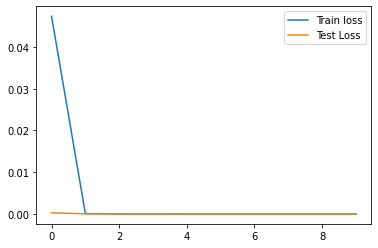

In [45]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [46]:

predictions = model.predict(X_test_processed)
prediction=np.round(predictions)
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13387
         1.0       1.00      1.00      1.00       290

    accuracy                           1.00     13677
   macro avg       1.00      1.00      1.00     13677
weighted avg       1.00      1.00      1.00     13677



In [47]:
sample_df.to_csv('submission.csv')